In [2]:
!pip install pandas matplotlib sklearn seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

# Load the dataset
data = pd.read_csv('data2.csv')
data

  Using cached sklearn-0.0.post7.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2951 sha256=1a53e02c3680d4c39e5cd8fe337b4d4498e20397b5cf2638bda181edcfbd7e16
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# New Section

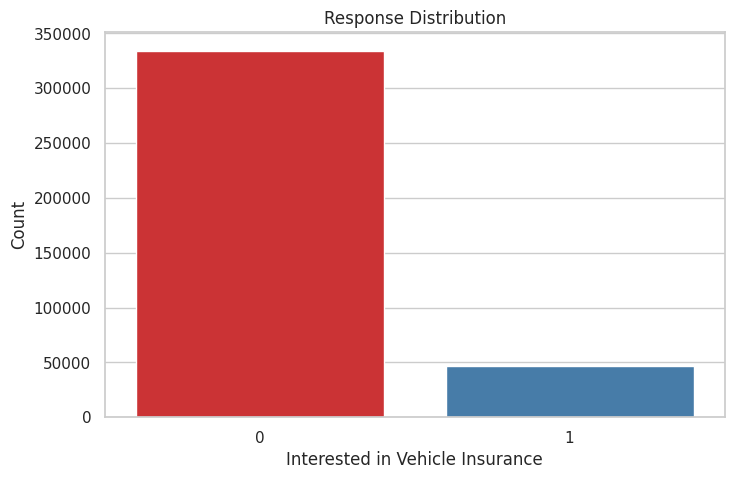

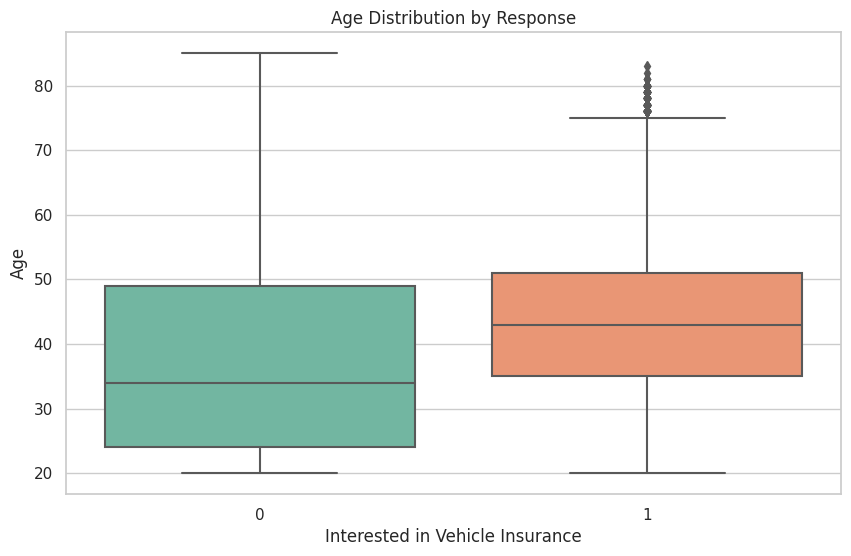

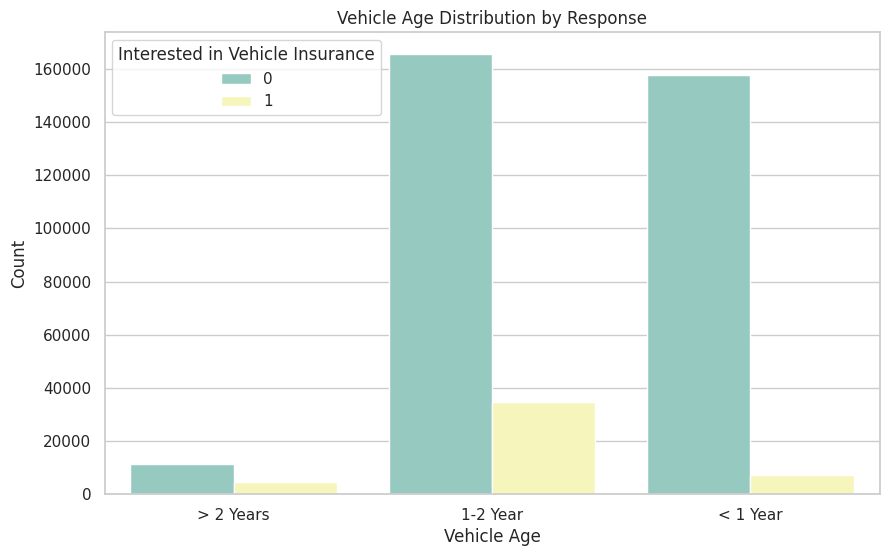

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = pd.read_csv('data2.csv')
data

# Data visualization
sns.set(style="whitegrid")

# Plotting response distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', data=data, palette="Set1")
plt.title('Response Distribution')
plt.xlabel('Interested in Vehicle Insurance')
plt.ylabel('Count')
plt.show()

# Age distribution by response
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=data, palette="Set2")
plt.title('Age Distribution by Response')
plt.xlabel('Interested in Vehicle Insurance')
plt.ylabel('Age')
plt.show()

# Vehicle age distribution by response
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Age', hue='Response', data=data, palette="Set3")
plt.title('Vehicle Age Distribution by Response')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.legend(title='Interested in Vehicle Insurance')
plt.show()

# ... more visualizations can be added here

# Separate features (X) and target (y)
X = data.drop('Response', axis=1)
y = data['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['Age', 'Annual_Premium', 'Vintage']
categorical_features = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
